In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from textblob import TextBlob
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /Users/melany/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/melany/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('tweets.csv',sep=',',encoding = "utf-8")
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,#muslimcommunity night with the @warriors on T...,False,0,NaN,2019-10-25T22:01:22Z,True,NaN,1187851672359301120,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",IrfanRydhan,0,False,False,NaN,NaN
1,RT @WarriorNationCP: Hard to swallow pills 😞\n...,False,0,NaN,2019-10-25T22:00:33Z,False,NaN,1187851466133790720,NaN,"<a href=""http://twitter.com/download/android"" ...",muinuuuh,20,True,False,NaN,NaN
2,RT @WarriorNationCP: Through thick and thin🤝\n...,False,0,NaN,2019-10-25T21:56:40Z,False,NaN,1187850489049673728,NaN,"<a href=""http://twitter.com/download/android"" ...",muinuuuh,9,True,False,NaN,NaN
3,RT @SVwordgirl: An actual recap of what #NBATw...,False,0,NaN,2019-10-25T21:54:43Z,False,NaN,1187850000287404033,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",catdudeallday,1,True,False,NaN,NaN
4,"""Warriors! Come out to play-ay!""\n\nCe soir Fu...",False,0,NaN,2019-10-25T21:54:20Z,True,NaN,1187849902853939202,NaN,"<a href=""https://www.hopperhq.com/"" rel=""nofol...",popinaboxfr,0,False,False,NaN,NaN


## 3. función normalizadora de texto

In [3]:
def word_norm(text):
  text = text.str.lower()
  text = text.replace('.', '')
  text = text.replace(',', '')
  text = text.replace('!', '')
  text = text.replace(to_replace =r'!', value='',regex=True)
  text = text.replace('á', 'a')
  text = text.replace('é', 'e')
  text = text.replace('í', 'i')
  text = text.replace('ó', 'o')
  text = text.replace('ú', 'u')
  text = text.replace('?', '')
  text = text.replace('!', '')
  text = text.replace(to_replace =r'-', value='',regex=True)
  text = text.replace(')', '')
  text = text.replace('(', '')
  text = text.replace(':', '')
  text = text.replace('/', '')
  return(text)

df[['text']] = word_norm(df.text)

In [4]:
def handler(row):
    y = re.search('^rt @.*:',row['text'])
    if y == None:
        return "No rt"
    else:
        return y.group(0)[2:-1]
df['Handler'] = df.apply(lambda row: handler(row),axis = 1)
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,Handler
0,#muslimcommunity night with the @warriors on t...,False,0,NaN,2019-10-25T22:01:22Z,True,NaN,1187851672359301120,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",IrfanRydhan,0,False,False,NaN,NaN,No rt
1,rt @warriornationcp: hard to swallow pills 😞\n...,False,0,NaN,2019-10-25T22:00:33Z,False,NaN,1187851466133790720,NaN,"<a href=""http://twitter.com/download/android"" ...",muinuuuh,20,True,False,NaN,NaN,@warriornationcp
2,rt @warriornationcp: through thick and thin🤝\n...,False,0,NaN,2019-10-25T21:56:40Z,False,NaN,1187850489049673728,NaN,"<a href=""http://twitter.com/download/android"" ...",muinuuuh,9,True,False,NaN,NaN,@warriornationcp
3,rt @svwordgirl: an actual recap of what #nbatw...,False,0,NaN,2019-10-25T21:54:43Z,False,NaN,1187850000287404033,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",catdudeallday,1,True,False,NaN,NaN,@svwordgirl
4,"""warriors come out to playay""\n\nce soir funko...",False,0,NaN,2019-10-25T21:54:20Z,True,NaN,1187849902853939202,NaN,"<a href=""https://www.hopperhq.com/"" rel=""nofol...",popinaboxfr,0,False,False,NaN,NaN,No rt


In [5]:
df['Source'] = df.statusSource.str.extract('(android|instagram|iphone|https|facebook|nofollow|wp)')
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,Handler,Source
0,#muslimcommunity night with the @warriors on t...,False,0,NaN,2019-10-25T22:01:22Z,True,NaN,1187851672359301120,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",IrfanRydhan,0,False,False,NaN,NaN,No rt,instagram
1,rt @warriornationcp: hard to swallow pills 😞\n...,False,0,NaN,2019-10-25T22:00:33Z,False,NaN,1187851466133790720,NaN,"<a href=""http://twitter.com/download/android"" ...",muinuuuh,20,True,False,NaN,NaN,@warriornationcp,android
2,rt @warriornationcp: through thick and thin🤝\n...,False,0,NaN,2019-10-25T21:56:40Z,False,NaN,1187850489049673728,NaN,"<a href=""http://twitter.com/download/android"" ...",muinuuuh,9,True,False,NaN,NaN,@warriornationcp,android
3,rt @svwordgirl: an actual recap of what #nbatw...,False,0,NaN,2019-10-25T21:54:43Z,False,NaN,1187850000287404033,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",catdudeallday,1,True,False,NaN,NaN,@svwordgirl,https
4,"""warriors come out to playay""\n\nce soir funko...",False,0,NaN,2019-10-25T21:54:20Z,True,NaN,1187849902853939202,NaN,"<a href=""https://www.hopperhq.com/"" rel=""nofol...",popinaboxfr,0,False,False,NaN,NaN,No rt,https


# 4. Corpus 

In [6]:
def corpus_creator(data):
    data['text'] = data.text.str.lower()
    data['screenName'] = data['screenName']
    data['retweetCount'] = data[['retweetCount']]
    data['Source'] = data[['Source']]
    out = df[['text','Handler','screenName','retweetCount','Source']]
    return out

In [7]:
data = corpus_creator(df)
data.head()

,text,Handler,screenName,retweetCount,Source
0,#muslimcommunity night with the @warriors on t...,No rt,IrfanRydhan,0,instagram
1,rt @warriornationcp: hard to swallow pills 😞\n...,@warriornationcp,muinuuuh,20,android
2,rt @warriornationcp: through thick and thin🤝\n...,@warriornationcp,muinuuuh,9,android
3,rt @svwordgirl: an actual recap of what #nbatw...,@svwordgirl,catdudeallday,1,https
4,"""warriors come out to playay""\n\nce soir funko...",No rt,popinaboxfr,0,https


# 5. Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['token'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
data.head()

/Users/melany/anaconda3/envs/dw_ufm/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,Handler,screenName,retweetCount,Source,token
0,#muslimcommunity night with the @warriors on t...,No rt,IrfanRydhan,0,instagram,"[#, muslimcommunity, night, with, the, @, warr..."
1,rt @warriornationcp: hard to swallow pills 😞\n...,@warriornationcp,muinuuuh,20,android,"[rt, @, warriornationcp, :, hard, to, swallow,..."
2,rt @warriornationcp: through thick and thin🤝\n...,@warriornationcp,muinuuuh,9,android,"[rt, @, warriornationcp, :, through, thick, an..."
3,rt @svwordgirl: an actual recap of what #nbatw...,@svwordgirl,catdudeallday,1,https,"[rt, @, svwordgirl, :, an, actual, recap, of, ..."
4,"""warriors come out to playay""\n\nce soir funko...",No rt,popinaboxfr,0,https,"[``, warriors, come, out, to, playay, '', ce, ..."


In [9]:
def lemmatize_text(row):
    return ' '.join([lemmatizer.lemmatize(w) for w in row['token']])

In [10]:
data['lem_text'] = data.apply(lambda row: lemmatize_text(row),axis = 1)
data.head()

/Users/melany/anaconda3/envs/dw_ufm/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Handler,screenName,retweetCount,Source,token,lem_text
0,#muslimcommunity night with the @warriors on t...,No rt,IrfanRydhan,0,instagram,"[#, muslimcommunity, night, with, the, @, warr...",# muslimcommunity night with the @ warrior on ...
1,rt @warriornationcp: hard to swallow pills 😞\n...,@warriornationcp,muinuuuh,20,android,"[rt, @, warriornationcp, :, hard, to, swallow,...",rt @ warriornationcp : hard to swallow pill 😞 ...
2,rt @warriornationcp: through thick and thin🤝\n...,@warriornationcp,muinuuuh,9,android,"[rt, @, warriornationcp, :, through, thick, an...",rt @ warriornationcp : through thick and thin🤝...
3,rt @svwordgirl: an actual recap of what #nbatw...,@svwordgirl,catdudeallday,1,https,"[rt, @, svwordgirl, :, an, actual, recap, of, ...",rt @ svwordgirl : an actual recap of what # nb...
4,"""warriors come out to playay""\n\nce soir funko...",No rt,popinaboxfr,0,https,"[``, warriors, come, out, to, playay, '', ce, ...",`` warrior come out to playay '' ce soir funko...


# 6. Polaridad y subjetividad

In [11]:
def sentiment_analysis(text):
    polarity = []
    subjectivity = []
    for tw in text:
        tw = TextBlob(tw)
        ann = tw.sentiment
        polarity.append(ann[0])
        subjectivity.append(ann[1])

    return polarity,subjectivity

In [12]:
data['PolarityText'], data['SubjectivityText']= sentiment_analysis(data.text)
data['PolarityLemText'], data['SubjectivityLemText']= sentiment_analysis(data.lem_text)
data.head()

/Users/melany/anaconda3/envs/dw_ufm/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/melany/anaconda3/envs/dw_ufm/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Handler,screenName,retweetCount,Source,token,lem_text,PolarityText,SubjectivityText,PolarityLemText,SubjectivityLemText
0,#muslimcommunity night with the @warriors on t...,No rt,IrfanRydhan,0,instagram,"[#, muslimcommunity, night, with, the, @, warr...",# muslimcommunity night with the @ warrior on ...,0.136364,0.454545,0.136364,0.454545
1,rt @warriornationcp: hard to swallow pills 😞\n...,@warriornationcp,muinuuuh,20,android,"[rt, @, warriornationcp, :, hard, to, swallow,...",rt @ warriornationcp : hard to swallow pill 😞 ...,-0.291667,0.541667,-0.291667,0.541667
2,rt @warriornationcp: through thick and thin🤝\n...,@warriornationcp,muinuuuh,9,android,"[rt, @, warriornationcp, :, through, thick, an...",rt @ warriornationcp : through thick and thin🤝...,-0.300000,0.475000,-0.300000,0.475000
3,rt @svwordgirl: an actual recap of what #nbatw...,@svwordgirl,catdudeallday,1,https,"[rt, @, svwordgirl, :, an, actual, recap, of, ...",rt @ svwordgirl : an actual recap of what # nb...,-0.145833,0.320833,-0.145833,0.320833
4,"""warriors come out to playay""\n\nce soir funko...",No rt,popinaboxfr,0,https,"[``, warriors, come, out, to, playay, '', ce, ...",`` warrior come out to playay '' ce soir funko...,0.000000,0.000000,0.000000,0.000000


## 7. Media de Polaridad y Subjetividad

In [13]:
import statistics as st
def promedio(col):
    x = st.mean(data[col])
    return x

sta = ['MeanPolaridadText',round(promedio('PolarityText'),5),
       'MeanPolaridadLemText', round(promedio('PolarityLemText'),5),
       'MeanSubjectivityText', round(promedio('SubjectivityText'),5),
       'MeanSubjectivityLemText', round(promedio('SubjectivityLemText'),5)]
sta

['MeanPolaridadText',
 0.04176,
 'MeanPolaridadLemText',
 0.03998,
 'MeanSubjectivityText',
 0.33858,
 'MeanSubjectivityLemText',
 0.34564]

La media de la polaridad de ambos textos difiere por 0.00178 y la subjetividad difiere por 0.00706, las cuales son diferencias muy pequeñas para poder concluir que la lematización afecta los resultados. Además, las cantidades que se pueden observar en el head no demuestran ser diferentes en la mayoría de los casos.

## 8. ¿Qué puede decir del sentimiento del corpus con base a la agregación del inciso 7?

La lematización no afecta significativamente el sentimiento de los datos. El que el promedio de la polaridad este muy cerca del 0 significa que la mayoría de los datos son neutros. Sin embargo, leyendo unos pocos, se puede notar que los tweets son de tristeza porque el equipo de los warrios acababa de perder, pero no son negativos y menos positivos. La subjetividad esta más o menos cerca del 0, lo que significa que las expresiones son subjetivas, esto es extraño pues, los tweets son de personas que estan mostrando sus sentimientos sobre el último partido que jugaron. 

## 9. ¿De dónde se originan la mayoría de tweets de su corpus?

In [67]:
datos = df[np.isfinite(df['longitude'])]
datos = datos.groupby(['longitude','latitude']).size()
datos

longitude    latitude  
-122.467500   37.695500    1
-122.431861   37.751444    1
-122.420000   37.760000    1
-122.395853   37.792973    1
-122.395046   37.768054    2
-122.388089   37.769300    2
-122.387502   37.767560    6
-122.284490   38.297870    1
-117.716804   34.063011    1
-97.414130    30.574010    1
-78.783400    35.787100    1
-74.006400    40.714200    1
-49.258439   -25.428822    1
-49.184980   -25.433070    1
-43.230102   -22.915136    1
-4.341488     55.881149    2
 55.274174    25.197587    1
dtype: int64

La latitud y longitud de donde se originan la mayor cantidad de tweets entre los datos del corpus es -122.387502 y 37.767560, con 6 tweets, estas cordenadas dan la ubicación de Mission Bay San Francisco California United States

## 9. ¿Cuál es el tweet más popular de su corpus?

In [51]:
data['text'].value_counts().head()


rt @sammywoodhouse1: huddersfield rape gang found guilty. \n\nrapists have today been found guilty from huddersfield for committing offences…     297
rt @warriornationcp: what a classy response from steph curry. 👏\n\n#dubnation #warriors https://t.co/tt6kxmnjy2                                   256
rt @warriornationcp: kawhi leonard believes that the team will be alright 👏\n\n#warriors #nba #nbatwitter https://t.co/8bx0imogtb                 212
rt @tomerazarly: patrick beverley draws the offensive foul on stephen curry, then the two jaw back and forth.\n\n#clippers #warriors https://…     86
rt @warriornationcp: andre iguodala considered ‘virtual lock’ to sign with #warriors next summer. #nba\nhttps://t.co/vfh4jj4a8c                    75
Name: text, dtype: int64

In [58]:
data[['text','retweetCount']].sort_values('retweetCount',ascending=False).head()

,text,retweetCount
5026,rt @keithndlovu1: i am an upcoming pencil arti...,779
4619,rt @lesdoggg: give me that @uswnt #warriors ht...,619
4511,rt @sammywoodhouse1: huddersfield rape gang fo...,320
1196,rt @sammywoodhouse1: huddersfield rape gang fo...,320
4554,rt @sammywoodhouse1: huddersfield rape gang fo...,320


Tomando en cuenta los datos que descargué este es el tweet más común, hay 297 observaciones registrando los retweets que le dieron. Sin embargo, este no tiene nada que ver con el equipo de la NBA Warriors, el cual es el tema que yo pretendía analizar, no algo sobre un violador.
rt @sammywoodhouse1: huddersfield rape gang found guilty. \n\nrapists have today been found guilty from huddersfield for committing offences… 

Tomando en cuenta el tweet con mayores retweet, es este con 779 retweet que no necesariamente los tengo en mi cuerpo.
rt @keithndlovu1: i am an upcoming pencil arti...	

## 10. WordCloud Lem_Text

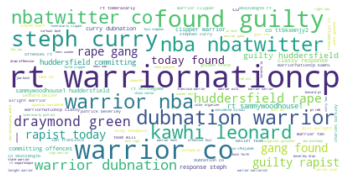

In [130]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = data['lem_text']
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()